In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 

data=pd.read_csv('train.csv')
data.head()

,id,X,y
0,0,-0.941942,-2.590608
1,1,0.071071,0.647941
2,2,0.391391,1.314478
3,3,0.115115,1.842491
4,4,0.673674,0.383065


In [18]:
data.drop(columns={'id'},inplace=True)

In [3]:
x=data['X'].values.reshape(-1,1)
y=data['y'].values(-1,1)

x_train , x_test , y_train , y_test = train_test_split (x , y , test_size =0.2 , random_state =42)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
m=-20
b=20

learning_rate=0.01
iterations=1000

n=len(x)

def predict(x,m,b):
    return (m*x)+b

def loss_fn(x,y,m,b):
    y_lnr_reg=predict(x,m,b)
    n=len(x)
    mse=0
    for i in range(n-1):
        mse1ststep=(y_lnr_reg[i]-y[i])**2
        mse=mse+mse1ststep
    mse=mse/n
    return mse

In [20]:
a=loss_fn(x,y,m,b)
print(a)

517.0633326892232


In [21]:
def gradient_descent(x,y,m,b,learning_rate):
    y_lnr_reg=predict(x,m,b)
    m_grad_bfr_2byn=0
    b_grad_bfr_2byn=0

    for i in range(n-1):

        m_grad_adding_to_mgrad_bfr_2byn=x*(y_lnr_reg[i]-y[i])
        m_grad_bfr_2byn=m_grad_bfr_2byn+m_grad_adding_to_mgrad_bfr_2byn
        
        b_grad_adding_to_mgrad_bfr_2byn=y_lnr_reg[i]-y[i]
        b_grad_bfr_2byn=b_grad_bfr_2byn+b_grad_adding_to_mgrad_bfr_2byn

    m_grad=(2*m_grad_bfr_2byn)/n
    b_grad=(2*b_grad_bfr_2byn)/n

    return m_grad, b_grad

gradient_descent(x,y,m,b,learning_rate)

(array([-36.35587768,   2.74311086,  15.10642739,   4.44306688,
         26.00160008,   7.45662528, -25.84705863,  32.33779981,
         -0.34771828,  25.07435134, -33.57413146, -27.70155611,
         32.8786949 ,  25.30616353,  12.01559826, -13.02011772,
         12.71103481, -19.35631745,  31.48782179,  16.11094686,
        -15.02915666,  18.11998579,  36.74223132, -34.81046311,
         30.63784378, -38.44218734,   3.43854741, -11.55197389,
         31.25600961,   2.82038158, -12.01559826,  38.21037516,
         -1.42950847,   5.83393999, -36.04679477, -36.20133622,
        -20.74719056,  35.81498258, -23.76074896, -12.86557627,
        -38.36491662, -22.83350022,   1.12042556,  23.14258314,
        -14.95188593, -30.17421941,  -5.37031562, -32.64688272,
        -32.10598762, -16.4973005 , -32.26052908,  37.97856297,
         22.36987585,  30.48330233,  -7.84297893, -13.63828355,
          1.5067792 ,  32.18325835,  32.64688272, -38.21037516,
         17.88817361,  -2.66584013, -31.

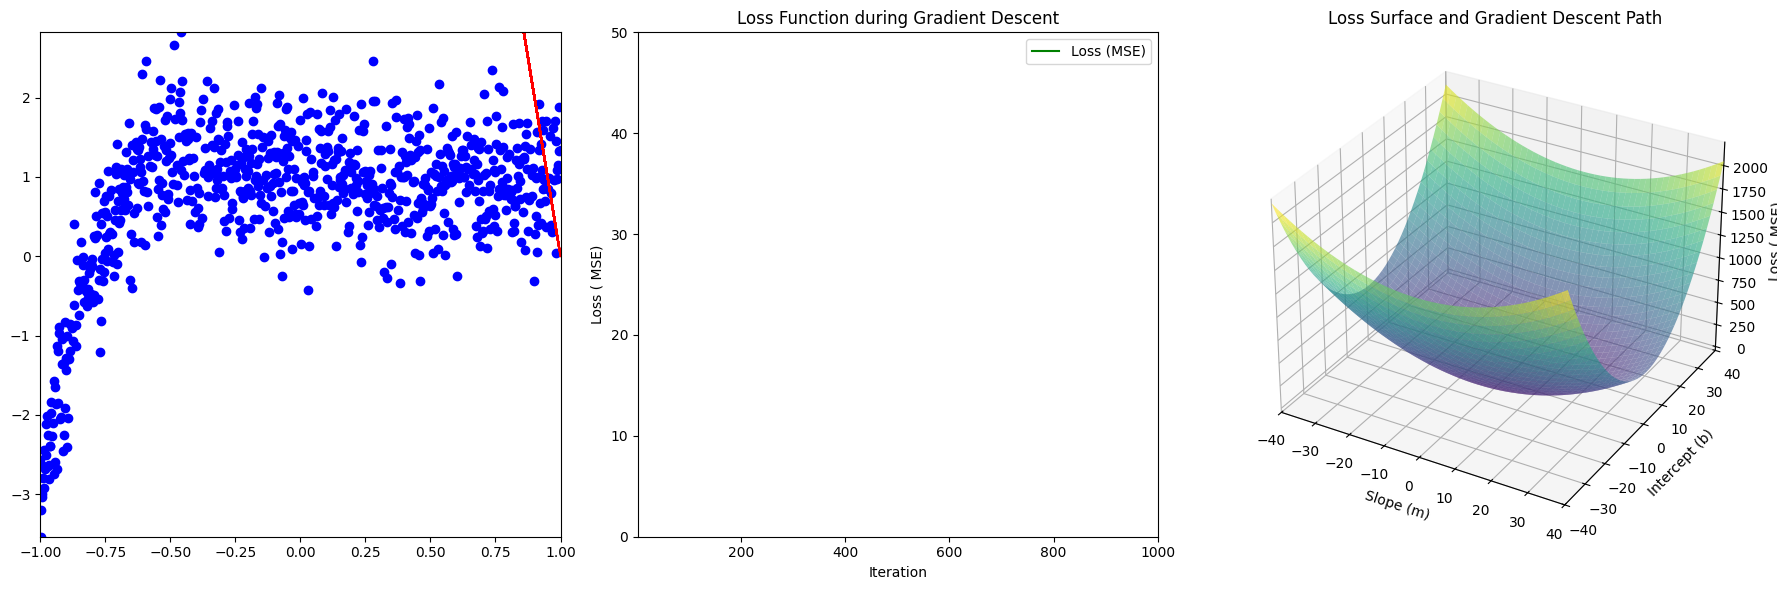

In [24]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Create grid of (m, b) values for the loss surface
m_vals = np . linspace ( -40 , 40 , 50)
b_vals = np . linspace ( -40 , 40 , 50)
M , B = np . meshgrid ( m_vals , b_vals )
loss_surface = np . zeros (M. shape )

# Compute loss surface
for i in range ( len( m_vals )):
    for j in range ( len( b_vals )):
        loss_surface[i , j] = loss_fn(x , y , M [i , j], B[i , j ])

# Set up figure with subplots
fig = plt . figure ( figsize =(18 , 6))

# Subplot 1: Data points and prediction line
ax1 = fig . add_subplot (131)
ax1 . set_xlim ( np . min (x), np .max( x ))
ax1 . set_ylim ( np . min (y), np .max( y ))
ax1 . scatter (x , y , color ='blue', label ='Data points')
line , = ax1 . plot (x , predict (x , m , b ), 'r-', label ='Prediction')

ax2 = fig . add_subplot (132)
ax2 . set_xlim (1 , iterations +1)
ax2 . set_ylim (0 , 50) # Start with an arbitrary range for loss values
loss_line , = ax2 . plot ([] , [] , 'g-', label ='Loss (MSE)')
ax2 . set_xlabel ('Iteration')
ax2 . set_ylabel ('Loss ( MSE)')
ax2 . set_title ('Loss Function during Gradient Descent')
ax2 . legend ()
# Subplot 3: 3D Loss surface plot
ax3 = fig . add_subplot (133 , projection ='3d')
ax3 . set_xlim ( -40 , 40)
ax3 . set_ylim ( -40 , 40)
ax3 . plot_surface (M , B , loss_surface , cmap ='viridis', alpha =0.6 , rstride =1 , cstride =1)
path_line , = ax3 . plot ([] , [] , [] , 'r-', marker ='o') # Path line for gradient descent
ax3 . set_xlabel ('Slope (m)')
ax3 . set_ylabel ('Intercept (b)')
ax3 . set_zlabel ('Loss ( MSE)')
ax3 . set_title ('Loss Surface and Gradient Descent Path')

def update ( frame ):
    loss_history=[]
    mb_history=[]
    global m , b
    steps_per_frame = 10 # Number of gradient descent steps per frame
    for _ in range( steps_per_frame ):
        if len ( loss_history ) >= iterations :
            break
        m , b = gradient_descent (x , y , m , b , learning_rate )
        current_loss = loss_fn (x , y , m , b)
        loss_history . append ( current_loss )
        mb_history . append ((m , b ))

    # Update the line in the first subplot
    line . set_ydata ( predict (x , m , b ))

    # Update the loss function plot
    loss_line . set_data ( range (len ( loss_history )) , loss_history )
    ax2 . set_ylim (0 , max ( loss_history ) + 5)
    
    # Update the 3D loss surface plot
    m_path , b_path = zip (* mb_history )
    path_line . set_data ( m_path , b_path )
    path_line . set_3d_properties ( loss_history )
    return line , loss_line , path_line

def init ():
    loss_line.set_data ([] , [])
    path_line.set_data ([] , [])
    path_line.set_3d_properties ([])
    return line,loss_line,path_line
    # Create the animation

frames = iterations // 10
interval = 5
ani = FuncAnimation ( fig , update , frames = frames , init_func = init , interval = interval , blit = True )
plt . tight_layout ()
plt.show()